<a href="https://colab.research.google.com/github/Madelavishnu/Evoastra_Assessment/blob/main/E_Commerce_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import zipfile

zip_ref= zipfile.ZipFile('/content/archive (7).zip')
zip_ref.extractall('data')
zip_ref.close()

In [7]:
!ls data/

ecommerce_customer_data_custom_ratios.csv  ecommerce_customer_data_large.csv


In [8]:
import os

# Walk through data directory and list number of files
for dirpath, dirnames, filenames in os.walk("data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} dirpath in '{dirpath}'.")

There are 0 directories and 2 dirpath in 'data'.


In [9]:
import pathlib
import numpy as np
data_dir = pathlib.Path("data") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['ecommerce_customer_data_custom_ratios.csv'
 'ecommerce_customer_data_large.csv']


In [14]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression


In [10]:
import pandas as pd

data = pd.read_csv("/content/data/ecommerce_customer_data_large.csv")
data

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0


In [11]:
data['Customer Age'].dtype


dtype('int64')

In [12]:
data['Gender'].dtype


dtype('O')

In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [17]:
print(data.head(5))
print(data.info())
print(data.describe())


   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        44605  2023-05-03 21:30:02             Home            177         1   
1        44605  2021-05-16 13:57:44      Electronics            174         3   
2        44605  2020-07-13 06:16:57            Books            413         1   
3        44605  2023-01-17 13:14:36      Electronics            396         3   
4        44605  2021-05-01 11:29:27            Books            259         4   

   Total Purchase Amount Payment Method  Customer Age  Returns Customer Name  \
0                   2427         PayPal            31      1.0   John Rivera   
1                   2448         PayPal            31      1.0   John Rivera   
2                   2345    Credit Card            31      1.0   John Rivera   
3                    937           Cash            31      0.0   John Rivera   
4                   2598         PayPal            31      1.0   John Rivera   

   Age  Gender  Churn  
0   31  

In [19]:
# Missing values
print(data.isnull().sum())

# Duplicate rows
print("Duplicate rows:", data.duplicated().sum())


Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64
Duplicate rows: 0


In [21]:
features = [
    'Customer Age',
    'Gender',
    'Product Category',
    'Product Price',
    'Quantity',
    'Total Purchase Amount',
    'Payment Method',
    'Returns'
]

target = 'Churn'

X = data[features]
y = data[target]


In [22]:
X

,Customer Age,Gender,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns
0,31,Female,Home,177,1,2427,PayPal,1.0
1,31,Female,Electronics,174,3,2448,PayPal,1.0
2,31,Female,Books,413,1,2345,Credit Card,1.0
3,31,Female,Electronics,396,3,937,Cash,0.0
4,31,Female,Books,259,4,2598,PayPal,1.0
...,...,...,...,...,...,...,...,...
249995,63,Male,Home,436,1,3664,Cash,0.0
249996,66,Female,Electronics,233,1,4374,Credit Card,1.0
249997,63,Female,Electronics,441,5,5296,Cash,NaN
249998,64,Male,Electronics,44,2,2517,Cash,1.0


In [23]:
y

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
249995,0
249996,0
249997,0
249998,0


In [24]:
numeric_features = [
    'Customer Age',
    'Product Price',
    'Quantity',
    'Total Purchase Amount'
]

categorical_features = [
    'Gender',
    'Product Category',
    'Payment Method'
]


/tmp/ipython-input-2247289622.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[target], y=data[col], palette='Set2', ax=axes[2])


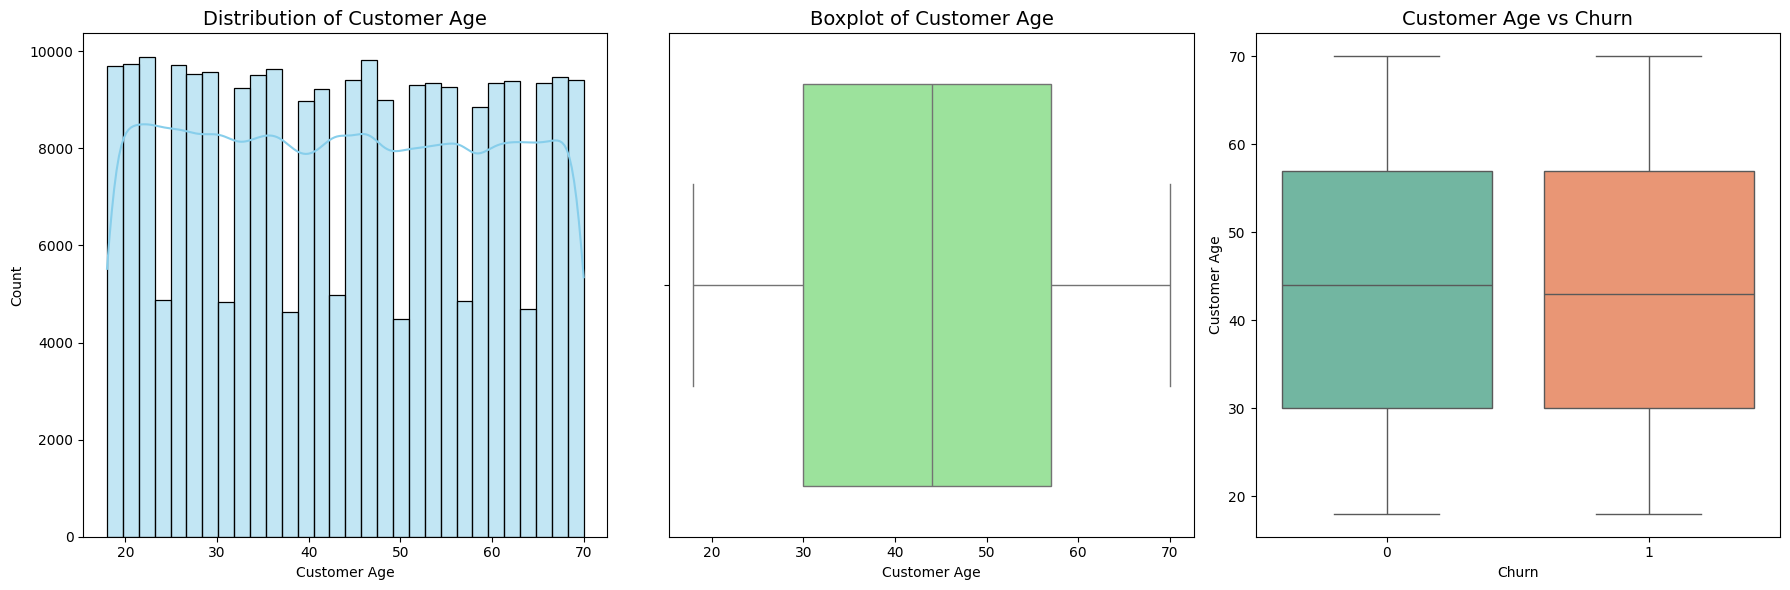

/tmp/ipython-input-2247289622.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[target], y=data[col], palette='Set2', ax=axes[2])


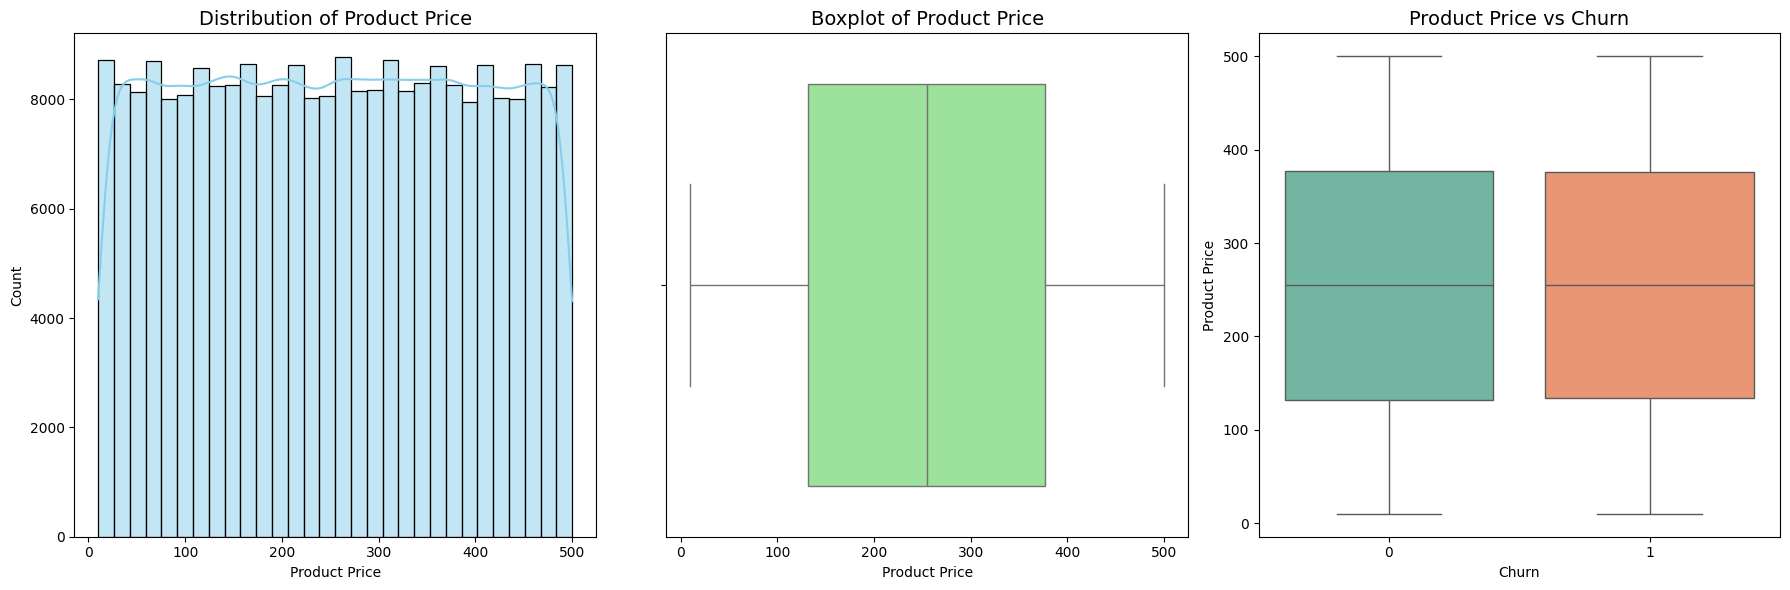

/tmp/ipython-input-2247289622.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[target], y=data[col], palette='Set2', ax=axes[2])


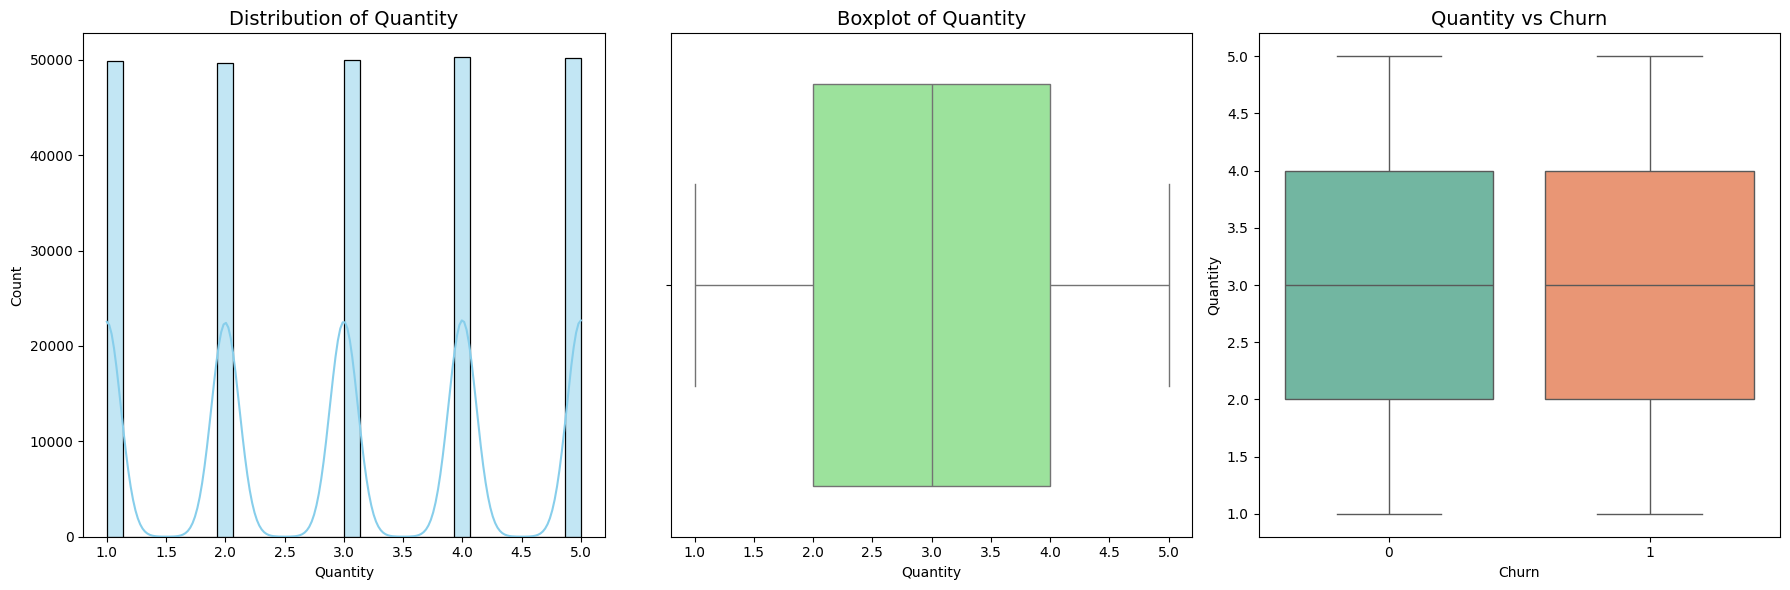

/tmp/ipython-input-2247289622.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[target], y=data[col], palette='Set2', ax=axes[2])


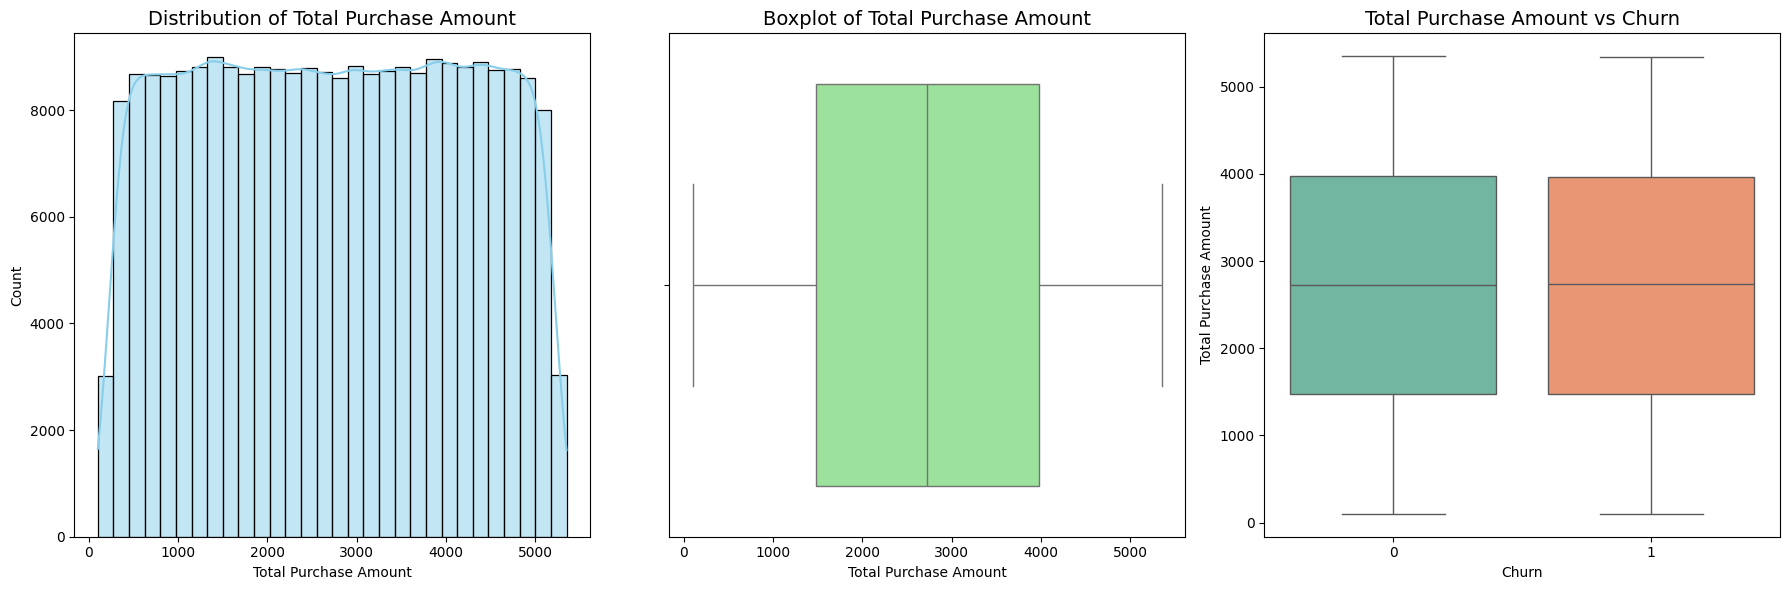

/tmp/ipython-input-2247289622.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], order=data[col].value_counts().index, palette='Set2', ax=axes[0])


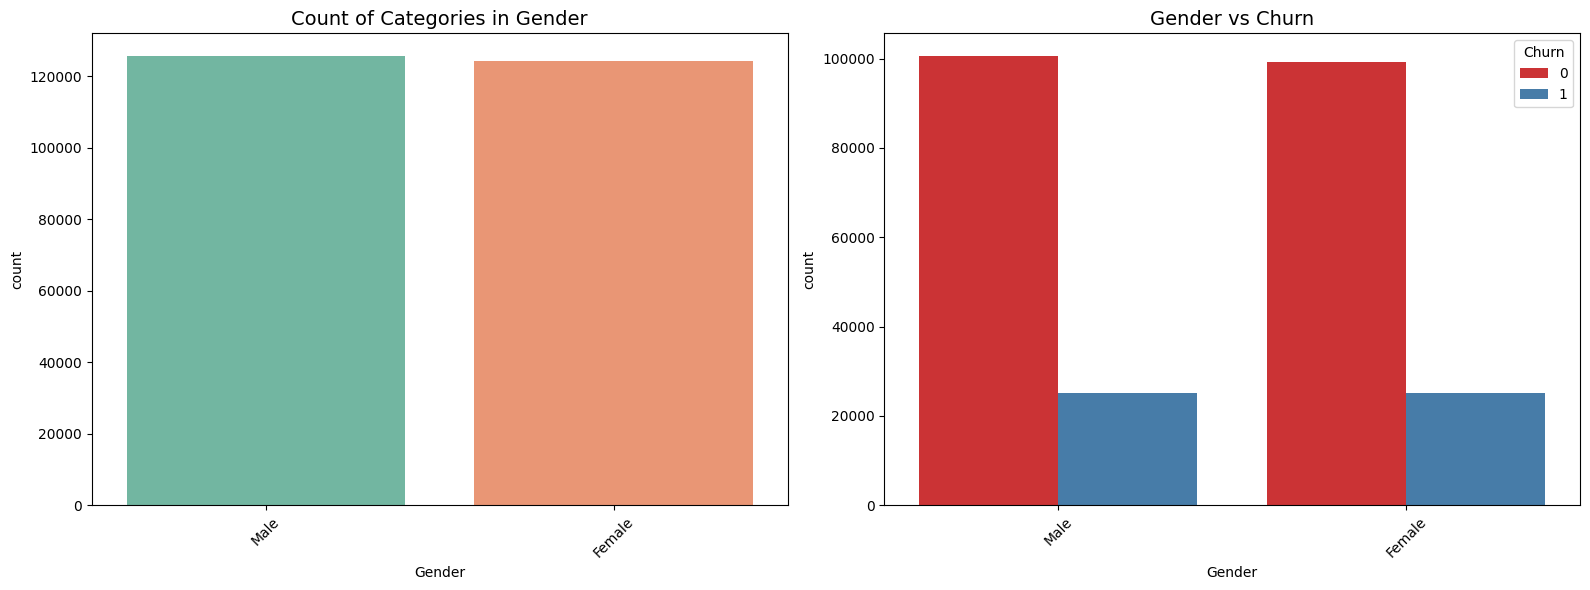

/tmp/ipython-input-2247289622.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], order=data[col].value_counts().index, palette='Set2', ax=axes[0])


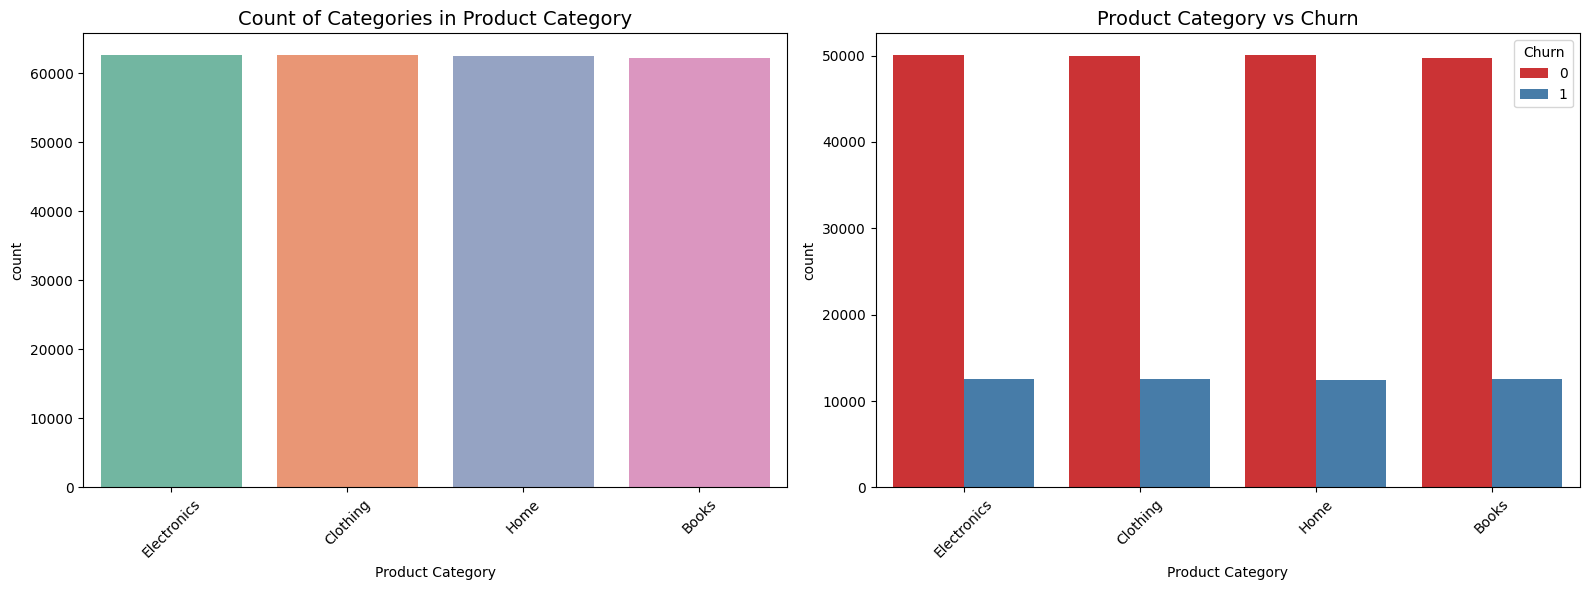

/tmp/ipython-input-2247289622.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], order=data[col].value_counts().index, palette='Set2', ax=axes[0])


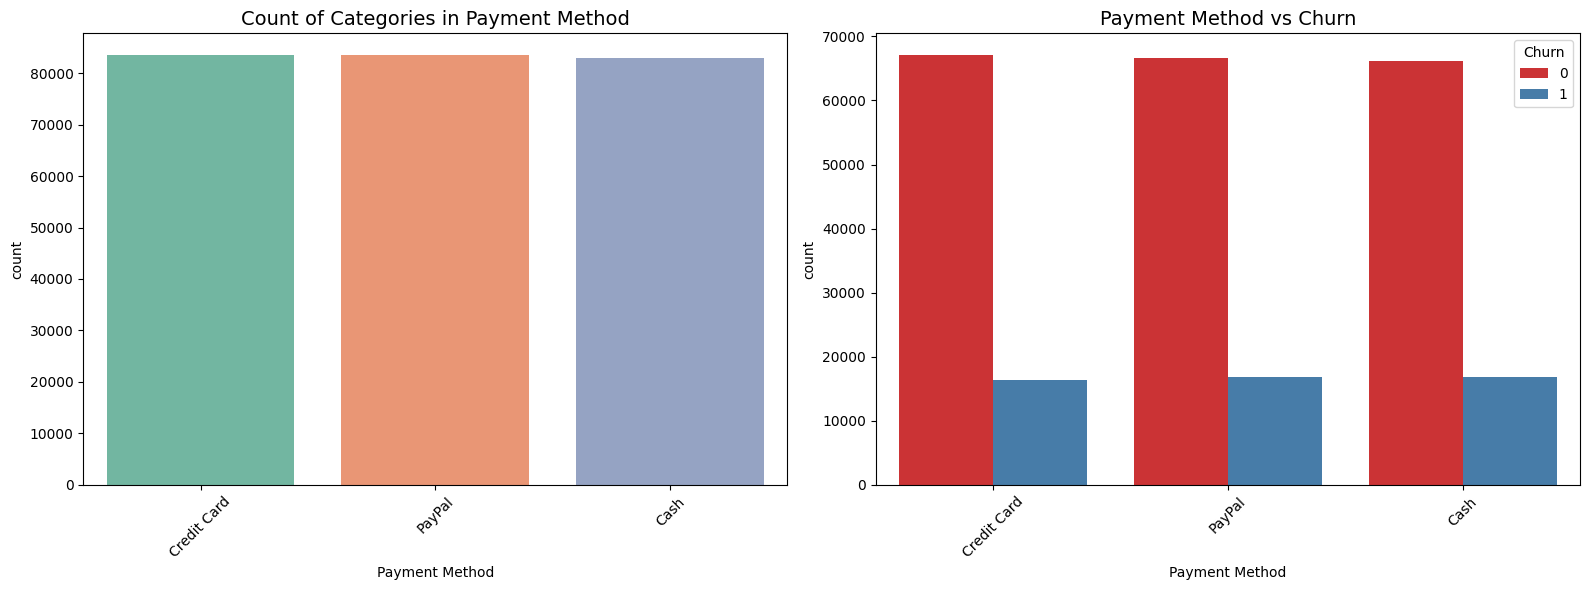

In [44]:
for col in numeric_features:
    fig, axes = plt.subplots(1, 3, figsize=(18,6))

    # Histogram
    sns.histplot(data[col], kde=True, bins=30, color='skyblue', ax=axes[0])
    axes[0].set_title(f'Distribution of {col}', fontsize=14)

    # Boxplot
    sns.boxplot(x=data[col], color='lightgreen', ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}', fontsize=14)

    # Churn relation
    sns.boxplot(x=data[target], y=data[col], palette='Set2', ax=axes[2])
    axes[2].set_title(f'{col} vs Churn', fontsize=14)

    plt.tight_layout()
    plt.show()

# ----------------------------
# Categorical features: count + churn relation
for col in categorical_features:
    fig, axes = plt.subplots(1, 2, figsize=(16,6))

    # Countplot
    sns.countplot(x=data[col], order=data[col].value_counts().index, palette='Set2', ax=axes[0])
    axes[0].set_title(f'Count of Categories in {col}', fontsize=14)
    axes[0].tick_params(axis='x', rotation=45)

    # Countplot vs Churn
    sns.countplot(x=data[col], hue=data[target], order=data[col].value_counts().index, palette='Set1', ax=axes[1])
    axes[1].set_title(f'{col} vs Churn', fontsize=14)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend(title='Churn')

    plt.tight_layout()
    plt.show()

In [25]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [27]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [28]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer Age',
                                                   'Product Price', 'Quantity',
                                                   'Total Purchase Amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Product Category',
                                                   'Payment Method'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [30]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
y_prob


array([0.20419723, 0.1982898 , 0.20584724, ..., 0.19642231, 0.20234107,
       0.20019817])

In [35]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[39974     0]
 [10026     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     39974
           1       0.00      0.00      0.00     10026

    accuracy                           0.80     50000
   macro avg       0.40      0.50      0.44     50000
weighted avg       0.64      0.80      0.71     50000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


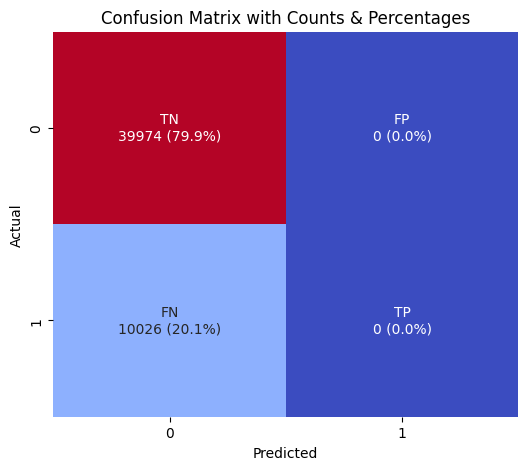

In [36]:
# Advanced Confusion Matrix Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum()  # normalize to percentage

# Define labels for each cell
labels = np.array([['TN', 'FP'],
                   ['FN', 'TP']])

# Combine labels with counts and percentages
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i,j] = f"{labels[i,j]}\n{cm[i,j]} ({cm_normalized[i,j]*100:.1f}%)"

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_normalized, annot=annot, fmt='', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Counts & Percentages')
plt.show()


In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.79948
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.5063593599953276


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
new_data = pd.DataFrame([{
    'Customer Age': 28,
    'Product Price': 1500,
    'Quantity': 2,
    'Total Purchase Amount': 3000,
    'Gender': 'Male',
    'Product Category': 'Electronics',
    'Payment Method': 'Credit Card'
}])

# Predict churn for new customer
new_pred = model.predict(new_data)
new_pred_proba = model.predict_proba(new_data)[:,1]

print(f"\nPredicted Churn: {new_pred[0]} (0=No, 1=Yes)")
print(f"Churn Probability: {new_pred_proba[0]:.2f}")


Predicted Churn: 0 (0=No, 1=Yes)
Churn Probability: 0.20
